In [39]:
# Import all required libraries:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
# Load dataset:
df = pd.read_csv("train.csv")

# Select necessary features:
data = df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']].copy()

# Drop missing values:
data.dropna(inplace=True)

In [41]:
# Define features and target:
X = data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = data['SalePrice']

# Train-test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model:
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model:
mse = mean_squared_error(y_test, model.predict(X_test))
r2 = r2_score(y_test, model.predict(X_test))

print(f"Model trained successfully.")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Model trained successfully.
Mean Squared Error: 2806426667.25
R2 Score: 0.63


In [42]:
# User Input:
print("Enter the house details below:")
sqft = float(input("Square Footage (GrLivArea): "))
bedrooms = int(input("Number of Bedrooms: "))
bathrooms = int(input("Number of Bathrooms: "))

# Prepare input as a DataFrame to avoid warning:
input_data = pd.DataFrame([[sqft, bedrooms, bathrooms]], columns=['GrLivArea', 'BedroomAbvGr', 'FullBath'])
predicted_price = model.predict(input_data)[0]

print(f"\n🏠 Estimated House Price: ${predicted_price:,.2f}")

Enter the house details below:
Square Footage (GrLivArea): 1000
Number of Bedrooms: 8
Number of Bathrooms: 2

🏠 Estimated House Price: $3,075.38


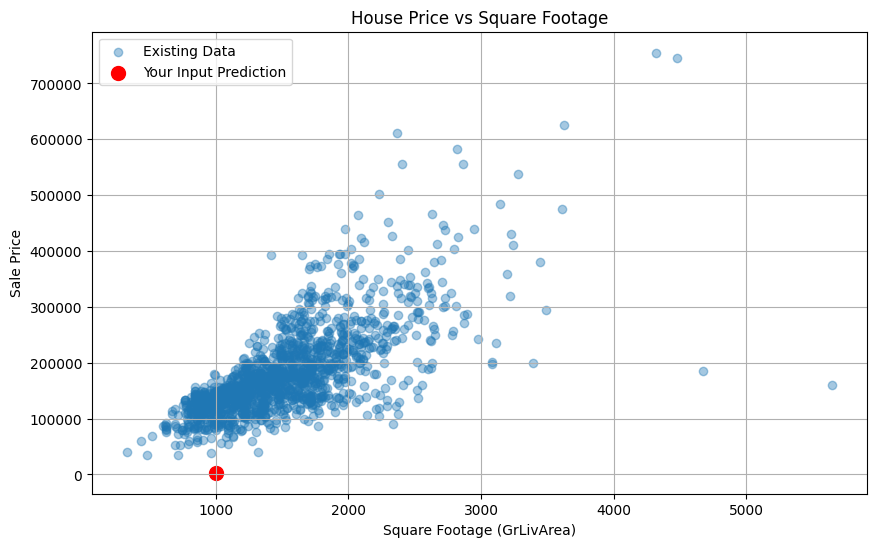

In [43]:
# Show Your Prediction on Existing Data
import matplotlib.pyplot as plt

# Plotting actual data
plt.figure(figsize=(10, 6))
plt.scatter(data['GrLivArea'], data['SalePrice'], alpha=0.4, label='Existing Data')

# Your prediction point
plt.scatter(sqft, predicted_price, color='red', s=100, label='Your Input Prediction')

plt.title('House Price vs Square Footage')
plt.xlabel('Square Footage (GrLivArea)')
plt.ylabel('Sale Price')
plt.legend()
plt.grid(True)
plt.show()
